In [173]:
#import libraries
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import KFold
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
from sklearn.feature_selection import RFECV
import operator
import warnings
warnings.simplefilter(action = "ignore") 

In [174]:
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.shape

(768, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
df.describe([0.10,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,10%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [8]:
profile = ProfileReport(df, title="Pandas Profiling Report", progress_bar=False)
profile.to_widgets()

In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


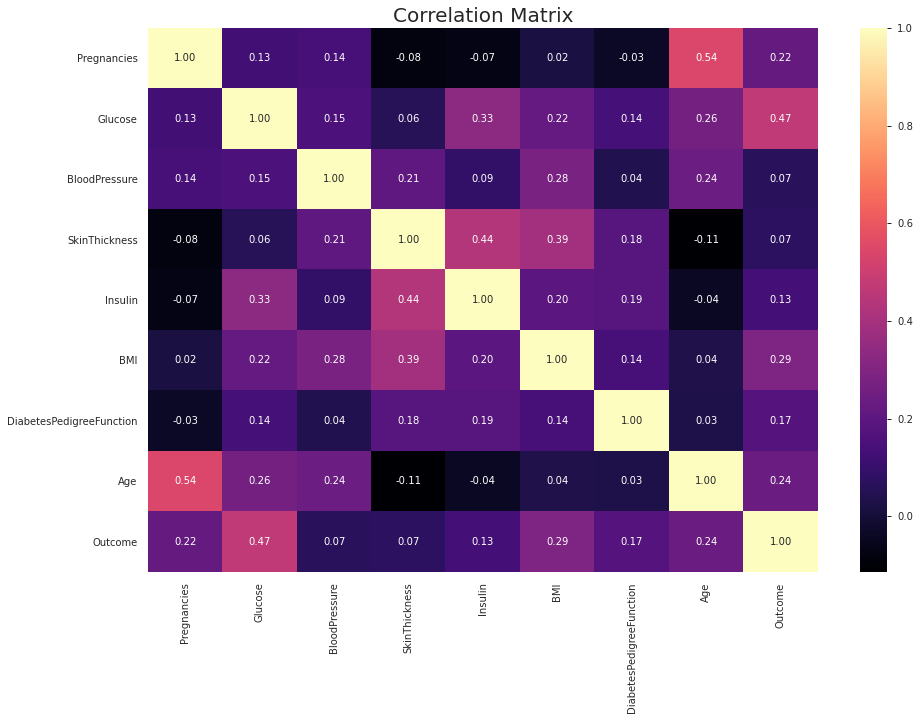

In [10]:
# Correlation matrix graph of the data set
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

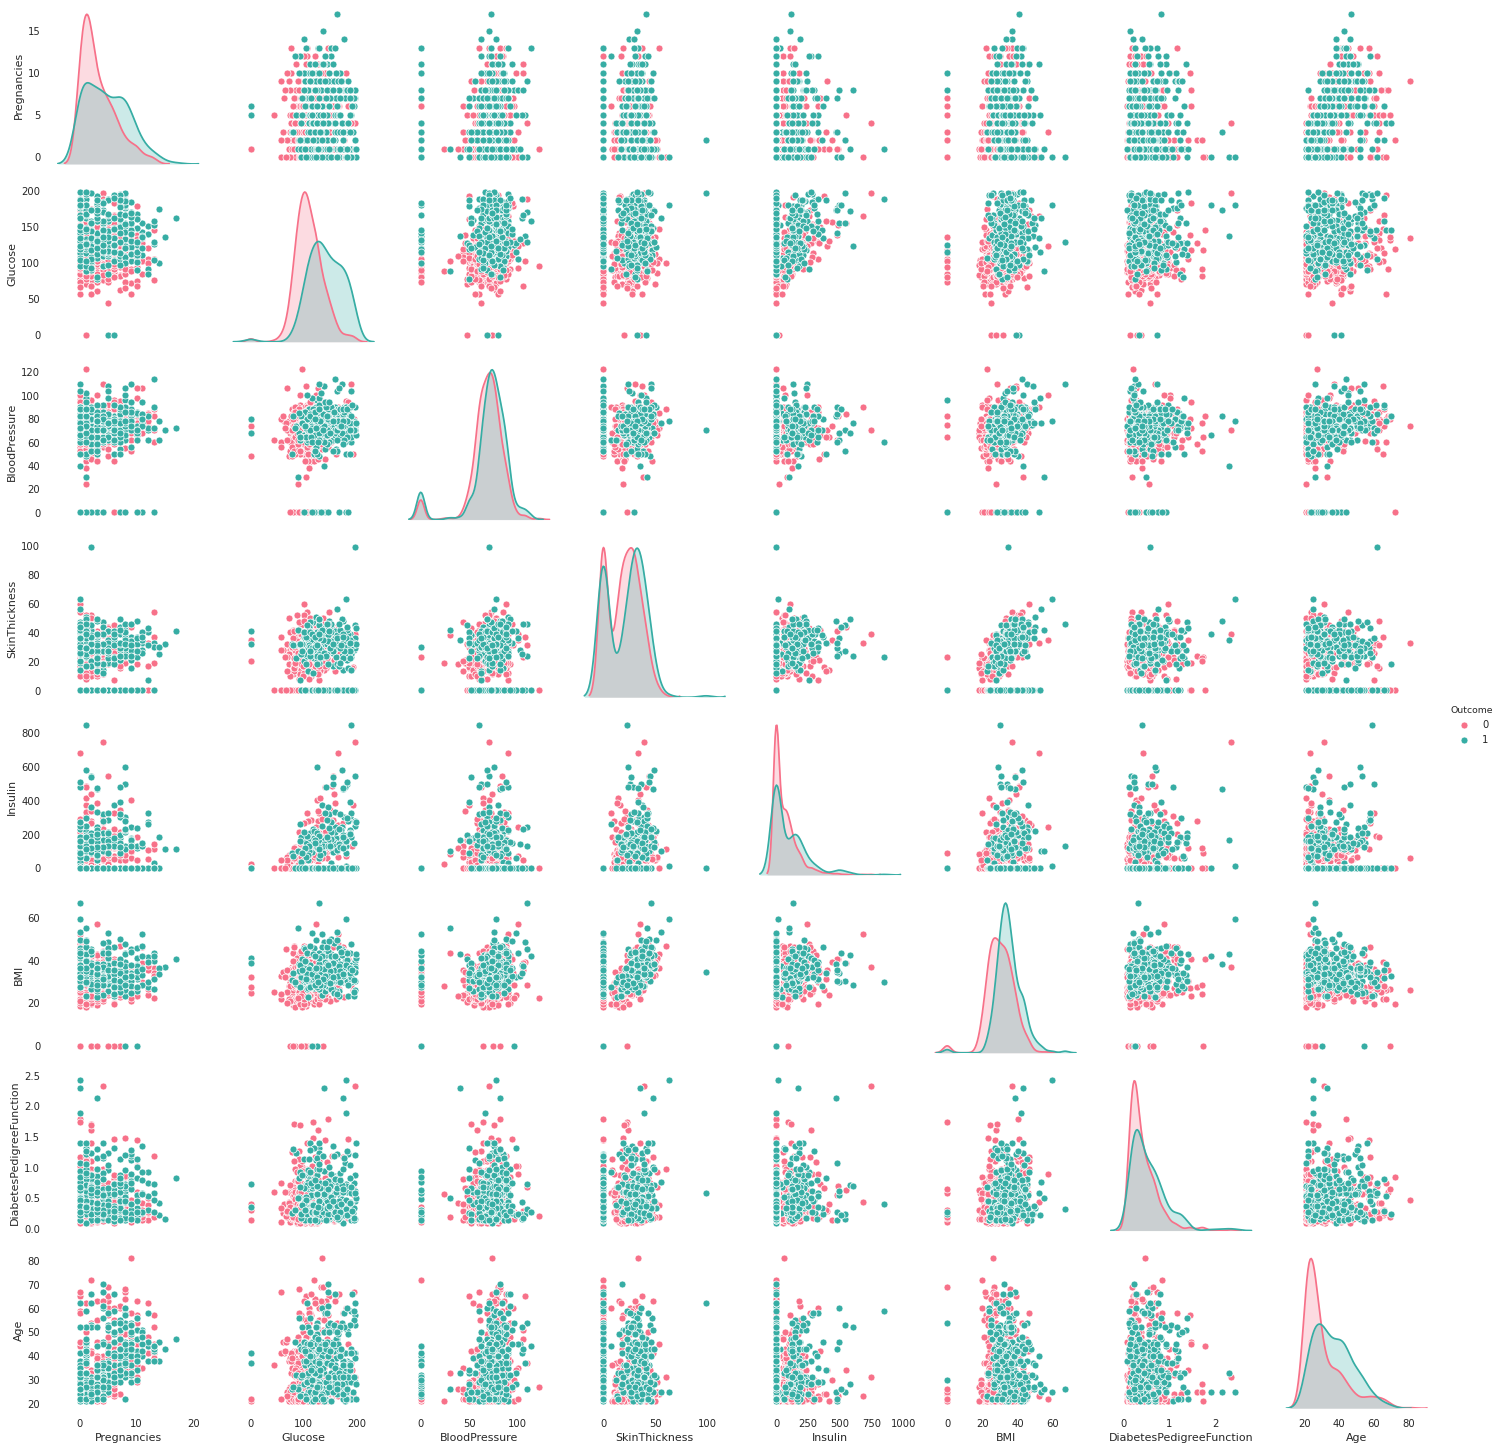

In [11]:
 g = sns.pairplot(df, hue="Outcome", palette="husl")

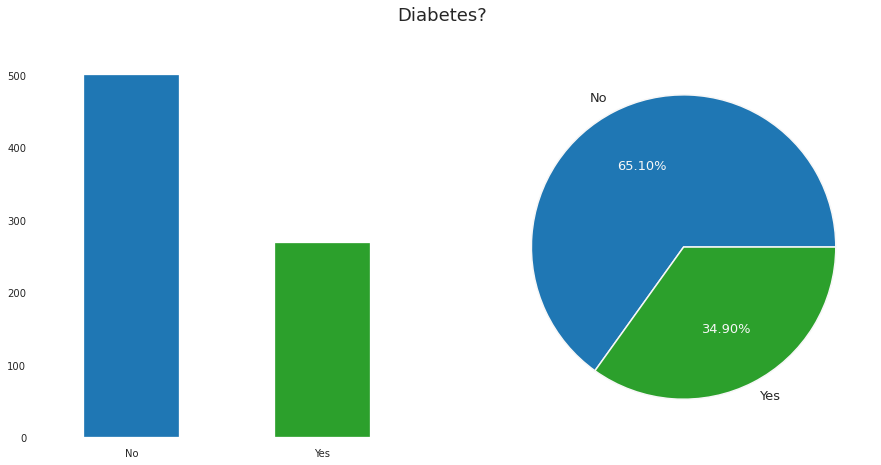

In [12]:
f, ax = plt.subplots(1, 2, figsize = (15, 7))
f.suptitle("Diabetes?", fontsize = 18.)
_ = df.Outcome.value_counts().plot.bar(ax = ax[0], rot = 0, color = (sns.color_palette()[0], sns.color_palette()[2])).set(xticklabels = ["No", "Yes"])
_ = df.Outcome.value_counts().plot.pie(labels = ("No", "Yes"), autopct = "%.2f%%", label = "", fontsize = 13., ax = ax[1],\
colors = (sns.color_palette()[0], sns.color_palette()[2]), wedgeprops = {"linewidth": 1.5, "edgecolor": "#F7F7F7"}), ax[1].texts[1].set_color("#F7F7F7"), ax[1].texts[3].set_color("#F7F7F7")

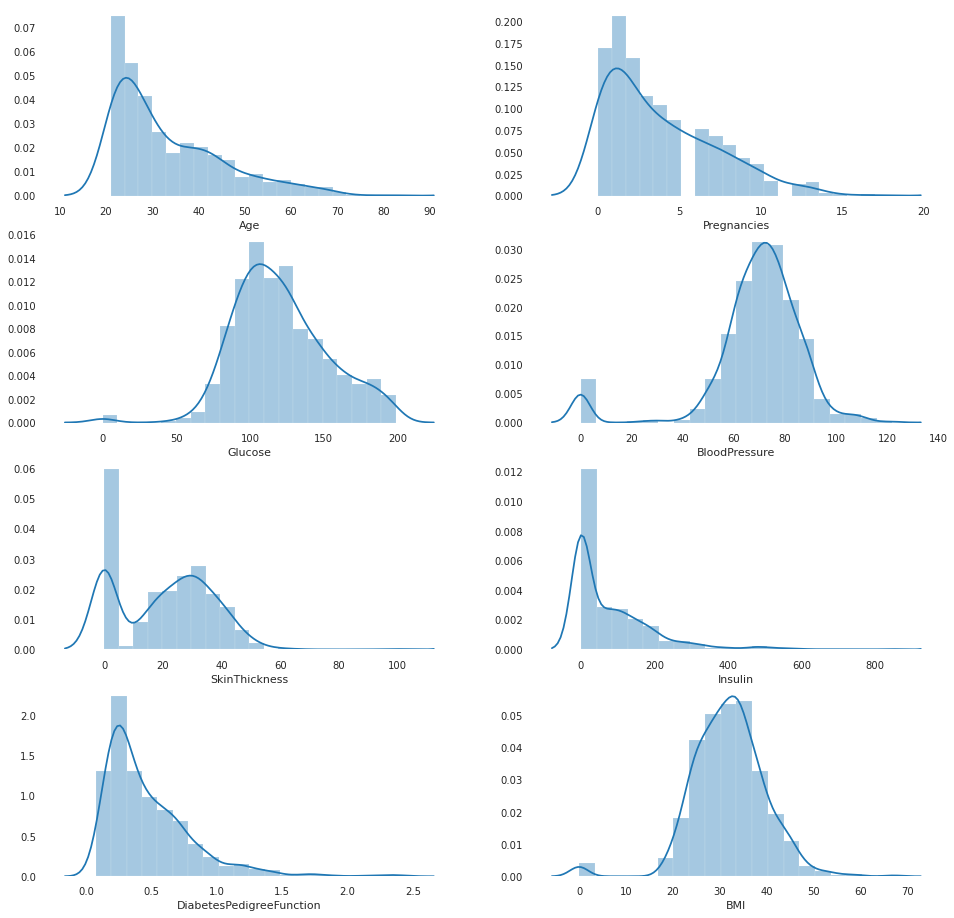

In [13]:
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

# Data Preprocessing

In [118]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [175]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [176]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [177]:
def median_target(var):   
    temp = df[df[var].notnull()]
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median()
    return temp

In [178]:
features = ["Insulin","Glucose","SkinThickness",'BloodPressure','BMI']
for feature in features:
    print(median_target(feature))

         Insulin
Outcome         
0          102.5
1          169.5
         Glucose
Outcome         
0          107.0
1          140.0
         SkinThickness
Outcome               
0                 27.0
1                 32.0
         BloodPressure
Outcome               
0                 70.0
1                 74.5
          BMI
Outcome      
0        30.1
1        34.3


In [179]:
features = ["Insulin","Glucose","SkinThickness",'BloodPressure','BMI']
for feature in features:
    negative = median_target(feature)[feature][0]
    positive = median_target(feature)[feature][1]
    df.loc[(df['Outcome'] == 0 ) & (df[feature].isnull()), feature] = negative
    df.loc[(df['Outcome'] == 1 ) & (df[feature].isnull()), feature] = positive

In [180]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [181]:
for feature in df.select_dtypes(include=['float',"int"]):
    
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if df[(df[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness yes
Insulin yes
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


In [182]:
Q1 = df["Insulin"].quantile(0.05)
Q3 = df["Insulin"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper, "Insulin"] = upper

In [183]:
Q1 = df["SkinThickness"].quantile(0.05)
Q3 = df["SkinThickness"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.loc[df["SkinThickness"] > upper, "SkinThickness"] = upper

In [184]:
df["InsSki"]=df["Insulin"]*df["SkinThickness"]
df["GluIns"]=df["Glucose"]*df["Insulin"]

In [185]:
Q1 = df["InsSki"].quantile(0.05)
Q3 = df["InsSki"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.loc[df["InsSki"] > upper, "InsSki"] = upper

Q1 = df["GluIns"].quantile(0.05)
Q3 = df["GluIns"].quantile(0.95)
IQR = Q3-Q1
upper = Q3 + 1.5*IQR
df.loc[df["GluIns"] > upper, "GluIns"] = upper


In [186]:
df.drop(["SkinThickness",'BloodPressure'],axis=1,inplace=True)

In [187]:
#We determine outliers between all variables with the Lof method
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 20)
lof.fit_predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

In [188]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-2.47721682, -2.09193755, -1.97822206, -1.96441838, -1.9462896 ,
       -1.93747953, -1.93276291, -1.92806892, -1.83695533, -1.81622104,
       -1.80292008, -1.79055572, -1.78576788, -1.77577239, -1.76405146,
       -1.76358047, -1.74385464, -1.7390561 , -1.73034828, -1.72667154,
       -1.70017799, -1.6994999 , -1.69893408, -1.66476885, -1.65697447,
       -1.64131646, -1.63078847, -1.63003727, -1.62695749, -1.62366015])

In [189]:
th = np.sort(df_scores)[8]
th

-1.836955327213333

In [190]:
#We delete those that are higher than the threshold
df = df[df_scores > th]
df.shape

(759, 9)

# First results

In [191]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis = 1)
cols = X.columns
index = X.index

In [192]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X,columns=cols,index=index)

In [193]:
# Tum modellerin train validasyon skorları

models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('XGB', GradientBoostingClassifier()))
models.append(("LightGBM", LGBMClassifier()))

# evaluate each model in turn
results = []
names = []

LR: 0.786614 (0.035918)
KNN: 0.832684 (0.026283)
CART: 0.841982 (0.034582)
RF: 0.888035 (0.034869)
SVM: 0.790561 (0.030554)
XGB: 0.890667 (0.032194)
LightGBM: 0.901263 (0.031177)


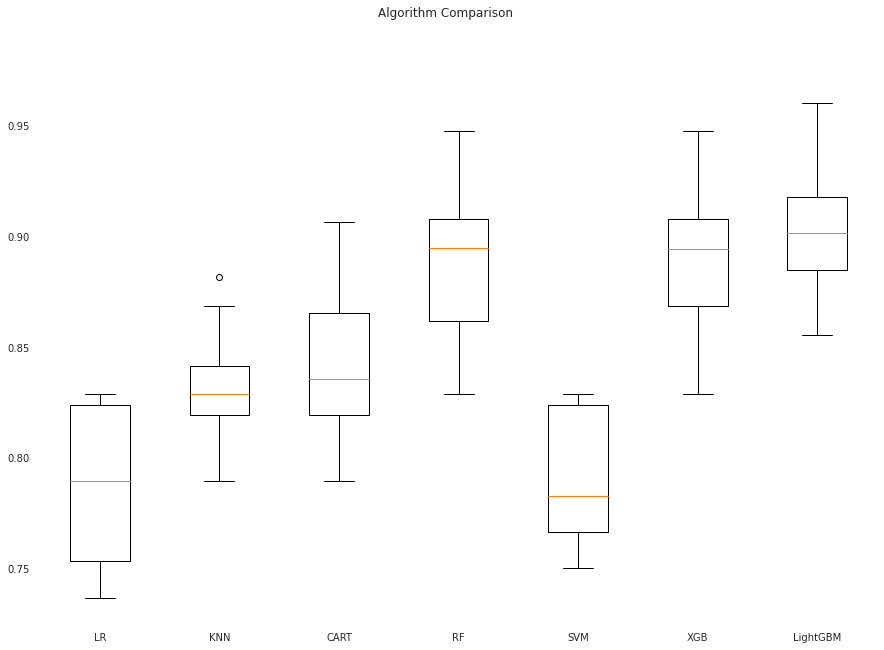

In [194]:
for name, model in models:
    
        kfold = KFold(n_splits = 10, random_state = 12345)
        cv_results = cross_val_score(model, X, y, cv = 10, scoring= "accuracy")
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
# boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Tuning işlemleri

## RF

In [195]:
rf_params = {"n_estimators" :[100,200,500], 
             "max_features": [3,5,8,], 
             "min_samples_split": [2,5,8],
            "max_depth": [3,5,8]}

In [196]:
rf_model = RandomForestClassifier(random_state = 12345)

In [197]:
gs_cv = GridSearchCV(rf_model, 
                    rf_params,
                    cv = 10,
                    n_jobs = -1,
                    verbose = 2).fit(X, y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  4.1min finished


In [198]:
gs_cv.best_params_

{'max_depth': 8,
 'max_features': 3,
 'min_samples_split': 2,
 'n_estimators': 500}

In [199]:
rf_tuned = RandomForestClassifier(**gs_cv.best_params_,random_state=12345)

In [200]:
rf_tuned = rf_tuned.fit(X,y)

In [201]:
cross_val_score(rf_tuned, X, y, cv = 10).mean()

0.8972631578947368

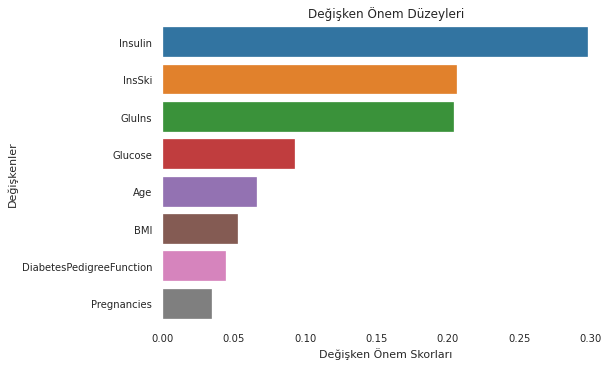

In [202]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## XGBoost

In [203]:
xgb = GradientBoostingClassifier(random_state=12345)

In [204]:
xgb_params = {"n_estimators": [100, 500, 1000],
              "subsample" : [0.6, 0.8, 1.0],
              "max_depth" : [3, 4, 5],
              "learning_rate" : [0.1, 0.01, 0.05,],
              "min_samples_split" : [2, 5, 10]}

In [205]:
xgb_cv_model = GridSearchCV(xgb, 
                     xgb_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 1450 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 1977 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 2430 out of 2430 | elapsed: 18.2min finished


In [206]:
xgb_cv_model.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_split': 10,
 'n_estimators': 100,
 'subsample': 0.6}

In [207]:
xgb_tuned = GradientBoostingClassifier(**xgb_cv_model.best_params_,random_state=12345)

In [208]:
xgb_tuned = xgb_tuned.fit(X,y)

In [209]:
cross_val_score(xgb_tuned, X, y, cv = 10).mean()

0.9038947368421052

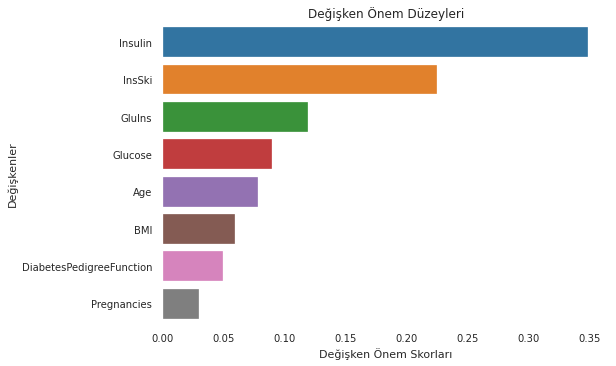

In [210]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()

## LGBM tuning

In [211]:
lgbm = LGBMClassifier(random_state = 12345)

In [212]:
lgbm_params = {"learning_rate": [0.01, 0.05, 0.1],
              "n_estimators": [100,500, 1000],
              "max_depth":[3,5,8]}

In [213]:
gs_cv = GridSearchCV(lgbm, 
                     lgbm_params, 
                     cv = 10, 
                     n_jobs = -1, 
                     verbose = 2).fit(X, y)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  83 tasks      | elapsed:    8.0s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed:   25.3s finished


In [214]:
gs_cv.best_params_

{'learning_rate': 0.05, 'max_depth': 8, 'n_estimators': 100}

In [215]:
lgbm_tuned = LGBMClassifier(**gs_cv.best_params_).fit(X,y)

In [216]:
cross_val_score(lgbm_tuned, X, y, cv = 10).mean()

0.907842105263158

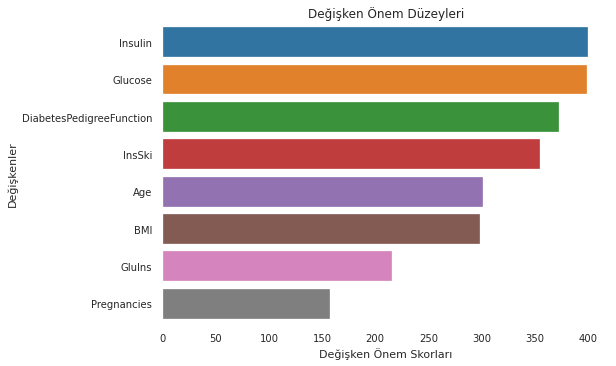

In [217]:
feature_imp = pd.Series(lgbm_tuned.feature_importances_,
                        index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Değişken Önem Skorları')
plt.ylabel('Değişkenler')
plt.title("Değişken Önem Düzeyleri")
plt.show()